<a href="https://colab.research.google.com/github/ithi-v3/AIML_task/blob/main/AIML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/data.csv"
df = pd.read_csv(file_path)
print(df.head())

Mounted at /content/drive
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0   

In [3]:
print(df.shape)

(60000, 785)


printed the dataset shape and values


In [12]:
print(df.columns)
print(df.iloc[:, 1:].describe())

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
             pixel1        pixel2        pixel3        pixel4        pixel5  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000900      0.006150      0.035333      0.101933      0.247967   
std        0.094689      0.271011      1.222324      2.452871      4.306912   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    226.000000    164.000000    227.000000

checking dataset format

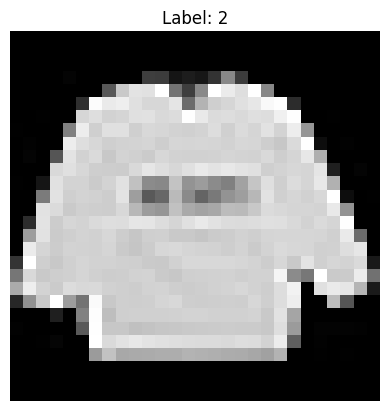

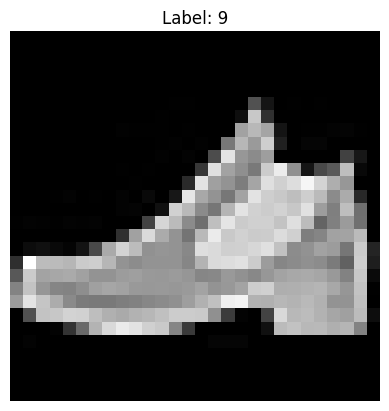

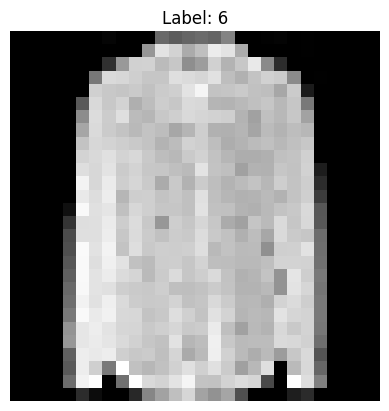

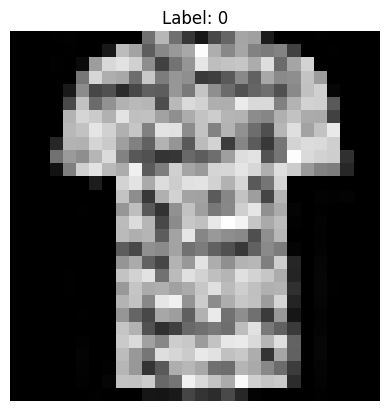

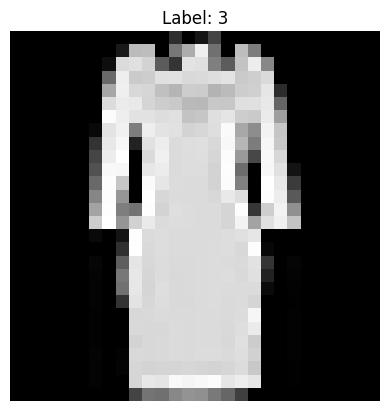

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image(index):
    label = df.iloc[index, 0]
    pixels = df.iloc[index, 1:].values.reshape(28, 28)

    plt.imshow(pixels, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()

for i in range(5):
    plot_image(i)


visualised using matplotlib

In [10]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


checked if Nan values are present

In [11]:
df_cleaned = df.dropna()
print(df_cleaned.shape)

(60000, 785)


Removed Nan values if any

In [13]:

print(df.describe())


              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169    

no error in the pixel values since all of them are in 0-255 range

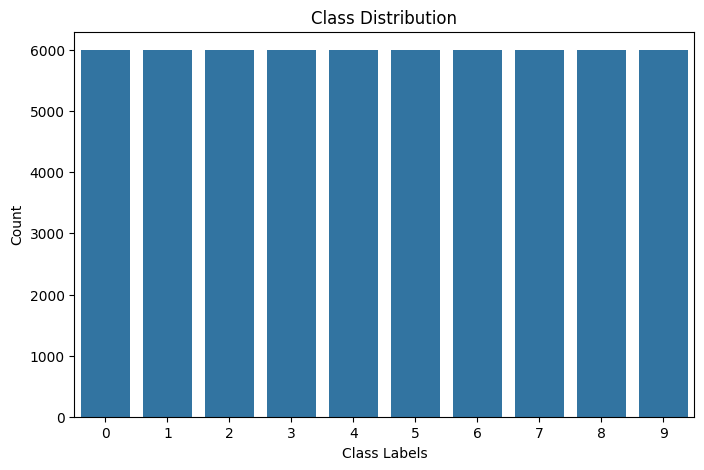

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,5))
sns.countplot(x=df.iloc[:, 0])
plt.title("Class Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()


visualised the distribution of categories

Class: 2


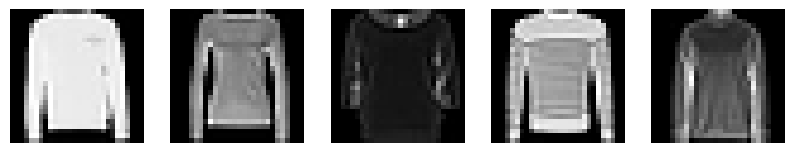

Class: 9


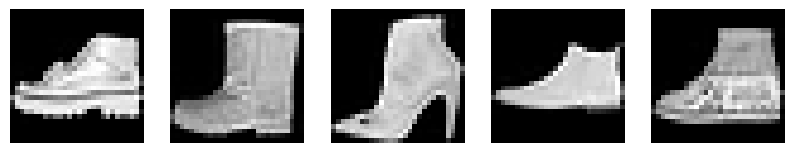

Class: 6


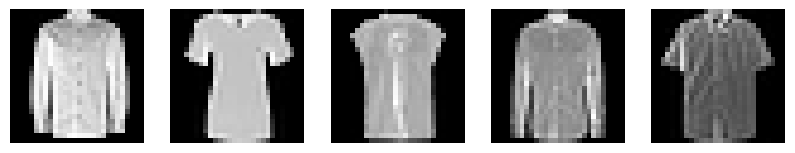

In [18]:
import numpy as np
def plot_images_per_class(class_label, df, num_samples=5):
    plt.figure(figsize=(10,2))
    samples = df[df.iloc[:, 0] == class_label].sample(num_samples, random_state=42)
    for i, idx in enumerate(samples.index):
        plt.subplot(1, num_samples, i+1)
        pixels = df.iloc[idx, 1:].values.reshape(28, 28)
        plt.imshow(pixels, cmap='gray')
        plt.axis("off")
    plt.show()
unique_labels = df.iloc[:, 0].unique()
for label in unique_labels[:3]:
    print(f"Class: {label}")
    plot_images_per_class(label, df)



visualised correctly and grouped images by class